***

*Course:* [Math 444](https://people.math.wisc.edu/~hlyu36/GNiDS/) - Graphs and Networks in Data Science (MMiDS) - Fall 2023

*Author:* [Hanbaek Lyu](https://hanbaeklyu.com), Department of Mathematics, University of Wisconsin-Madison  

***

In [377]:
### Load some packages 

import networkx as nx # for handling graphs/networks 
import numpy as np # for basic scientific computing 
import matplotlib.pyplot as plt # for plotting
import matplotlib.gridspec as gridspec


# Stochastic Block Model

In [590]:
def list2onehot(y, list_classes=None):
    """
    y = list of class lables of length n
    output = n x k array, i th row = one-hot encoding of y[i] (e.g., [0,0,1,0,0])
    """
    if list_classes is None:
        list_classes = list(np.sort(c))
    Y = np.zeros(shape = [len(y), len(list_classes)], dtype=int)
    for i in np.arange(Y.shape[0]):
        for j in np.arange(len(list_classes)):
            if y[i] == list_classes[j]:
                Y[i,j] = 1
    return Y

In [619]:
c = [2,3,1]
print(list2onehot(c))

[[0 1 0]
 [0 0 1]
 [1 0 0]]


In [593]:
def SBM(W, c):
    # Stochastic block model; 
    # W = (k x k) community weight matrix 
    # c = (n x 1), entries from [k]; community assignment vector
    k = W.shape[0]
    n = len(c)
    
    # C = (n x k) one-hot encoding of community assignment matrix
    C = list2onehot(c, list_classes=[i for i in range(k)])

    # C = (n x n) probability matrix = expected adjacency matrix = C W C.T
    P = C @ W @ C.T
    
    # Now sample the edges according to P
    G = nx.Graph()
    G.add_nodes_from(range(n))
    nodes = list(G.nodes())
    
    for i in np.arange(n):
        for j in np.arange(i+1,n):
            U = np.random.rand()
            if U < P[i,j]:
                G.add_edge(nodes[i],nodes[j])
    return G

In [669]:
a = 0.8
b = 0.1
W = b * np.ones([3,3]) + (a-b) * np.eye(3)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])

In [670]:
W

array([[0.8, 0.1, 0.1],
       [0.1, 0.8, 0.1],
       [0.1, 0.1, 0.8]])

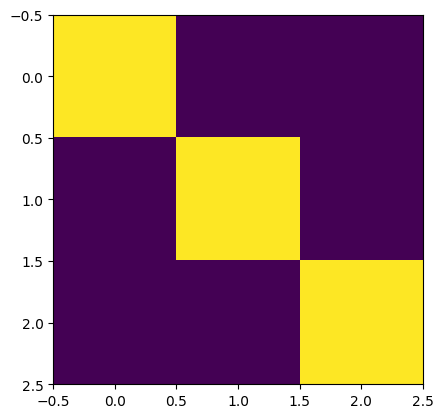

In [671]:
plt.imshow(W)

In [672]:
r = 10
c = [0]*r + [1]*r + [2]*r

In [673]:
G = SBM(W,c)

In [674]:
C = list2onehot(c, list_classes=[i for i in range(3)])

In [675]:
C

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1]])

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/3408396143.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))


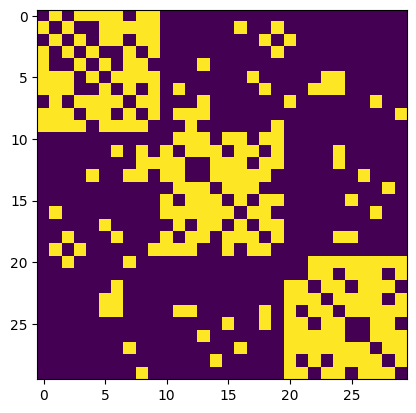

In [676]:
A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
plt.imshow(A1.todense())

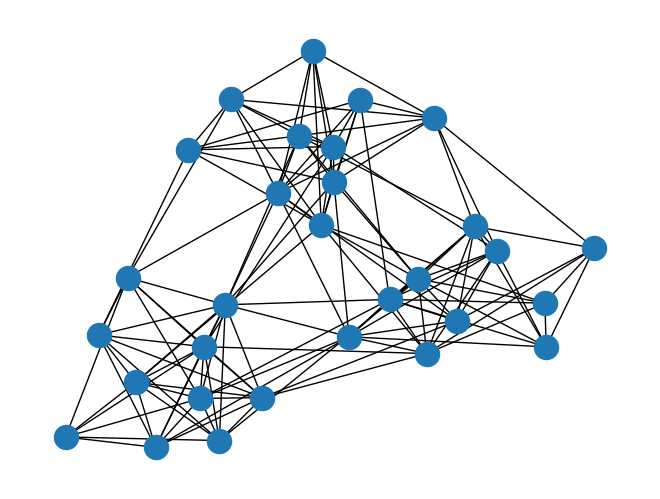

In [677]:
nx.draw(G)

In [678]:
list(G.nodes())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29]

In [702]:
def permute_nodes(G):
    node_mapping = dict(zip(G.nodes(), sorted(G.nodes(), key=lambda k: np.random.random())))
    G1 = nx.Graph()
    G1.add_nodes_from(list(G.nodes()))
    #nodes = list(G.nodes())
    
    for e in G.edges():
        u = node_mapping.get(e[0])
        v = node_mapping.get(e[1])
        G1.add_edge(u,v)
    return G1

In [703]:
G1 = permute_nodes(G)

sum A= 166


/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/2829968688.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G, nodelist=list(G.nodes()))


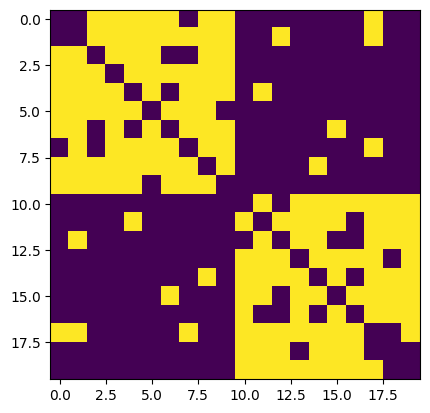

In [704]:
A = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
print("sum A=", np.sum(A))
plt.imshow(A.todense())

sum A= 166


/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/1269104748.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))


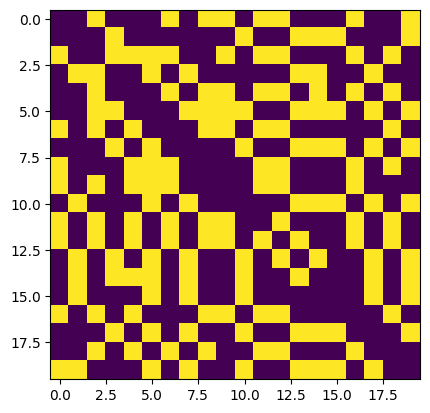

In [705]:
A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))
print("sum A=", np.sum(A1))
plt.imshow(A1.todense())

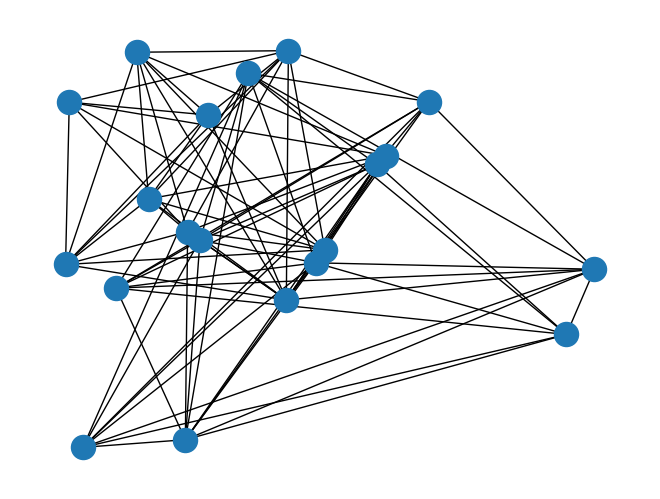

In [706]:
nx.draw(G1,pos=nx.random_layout(G1))

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/9812291.py:25: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))


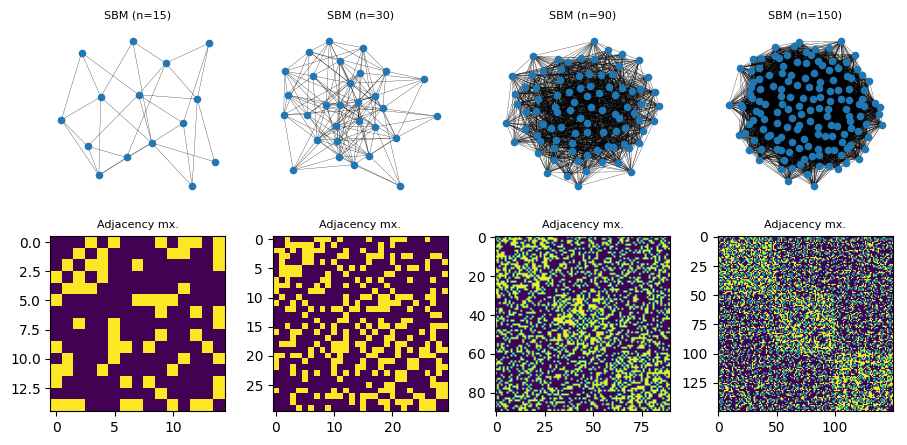

In [615]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
r_list=[5, 10, 30, 50]

a = 0.5
b = 0.3
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

outer_grid = gridspec.GridSpec(nrows=2, ncols=len(r_list), wspace=0.2, hspace=0.2)

for i in np.arange(len(r_list)): 
    r = r_list[i]
    c = [0]*r + [1]*r + [2]*r # community assignment vector
    
    G = SBM(W, c)    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.2 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')#, pos=nx.spectral_layout(G))
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)

    
    A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Adjacency mx.", fontsize=8)


plt.savefig("SBM_ex1", bbox_inches="tight")

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/3513671056.py:25: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))


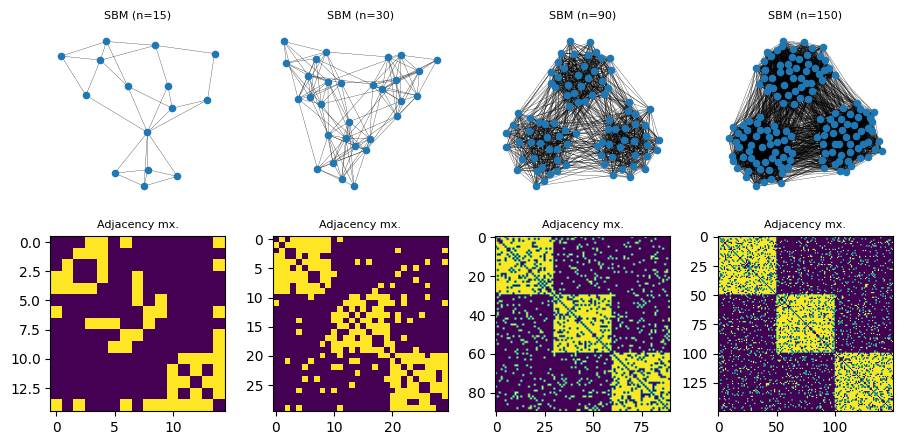

In [614]:
fig = plt.figure(figsize=[11,5], constrained_layout=False)
network_list = [""]
r_list=[5, 10, 30, 50]

a = 0.8
b = 0.1
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

outer_grid = gridspec.GridSpec(nrows=2, ncols=len(r_list), wspace=0.2, hspace=0.2)

for i in np.arange(len(r_list)): 
    r = r_list[i]
    c = [0]*r + [1]*r + [2]*r # community assignment vector
    
    G = SBM(W, c)    
    inner_grid = outer_grid[0,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.2 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')#, pos=nx.spectral_layout(G))
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)

    
    A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
    inner_grid1 = outer_grid[1,i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Adjacency mx.", fontsize=8)


plt.savefig("SBM_ex2", bbox_inches="tight")

In [622]:
a = 0.5
b = 0.3
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

In [623]:
W

array([[0.5, 0.3, 0.3],
       [0.3, 0.5, 0.3],
       [0.3, 0.3, 0.5]])

/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/3021273389.py:30: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/3021273389.py:47: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))


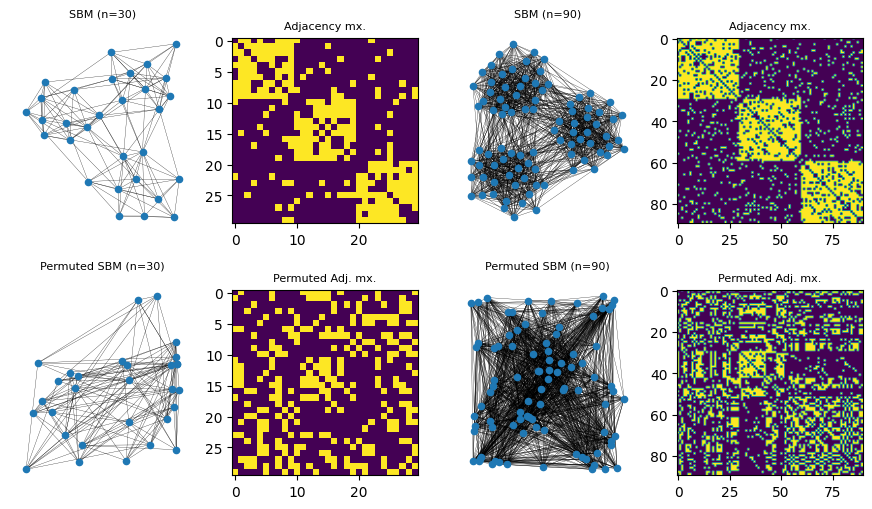

In [613]:
fig = plt.figure(figsize=[11,6], constrained_layout=False)
network_list = [""]
r_list=[10, 30]

a = 0.8
b = 0.1
W = b * np.ones([3,3]) + (a-b) * np.eye(3)

outer_grid = gridspec.GridSpec(nrows=2, ncols=len(r_list)*2, wspace=0.2, hspace=0.2)

for i in np.arange(len(r_list)): 
    r = r_list[i]
    c = [0]*r + [1]*r + [2]*r # community assignment vector
    G = SBM(W, c) 
    
    # create a random mapping old label -> new label
    G1 = permute_nodes(G)
    
    
    inner_grid = outer_grid[0,2*i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    edges = G.edges()
    weights = [0.2 for u,v in G.edges]
    nx.draw(G, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph')
    #ax.legend()
    ax.set_title(r"SBM (n={})".format(3*r), fontsize=8)
    
    inner_grid = outer_grid[0,2*i+1].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    A1 = nx.adjacency_matrix(G, nodelist=list(G.nodes()))
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Adjacency mx.", fontsize=8)

    ### Do the same for the node-permuted graph

    inner_grid1 = outer_grid[1,2*i].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid1[0, 0])
    edges = G1.edges()
    weights = [0.2 for u,v in G1.edges]
    nx.draw(G1, with_labels=False, width=weights, node_size=20, ax=ax, label='Graph', pos=nx.random_layout(G1))
    #ax.legend()
    ax.set_title(r"Permuted SBM (n={})".format(3*r), fontsize=8)
    
    inner_grid = outer_grid[1,2*i+1].subgridspec(1, 1, wspace=0, hspace=0)
    ax = fig.add_subplot(inner_grid[0, 0])
    A1 = nx.adjacency_matrix(G1, nodelist=list(G1.nodes()))
    ax.imshow(A1.todense())
    #ax.legend()
    ax.set_title(r"Permuted Adj. mx.", fontsize=8)



plt.savefig("SBM_ex4", bbox_inches="tight")

# Spectral clustering

In [687]:
from numpy import linalg as LA

In [709]:
a = 0.8
b = 0.1
W = b * np.ones([2,2]) + (a-b) * np.eye(2)
# W = np.array([[0.5, 0.1, 0.1], [0.1, 0.5, 0.1], [0.1, 0.1, 0.5]])

In [710]:
W

array([[0.8, 0.1],
       [0.1, 0.8]])

In [711]:
r = 10
c = [0]*r + [1]*r 

In [712]:
G = SBM(W,c)

In [713]:
A = nx.adjacency_matrix(G).toarray()
w, v = LA.eigh(A)
print("np.sum(A)=", np.sum(A))

np.sum(A)= 168


/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/2370429427.py:1: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A = nx.adjacency_matrix(G).toarray()


In [714]:
w

array([-3.2389917 , -2.96762135, -2.71668889, -1.99702841, -1.74131767,
       -1.6196439 , -1.52851145, -1.30177642, -1.05444123, -0.90476271,
       -0.64246506, -0.41149448, -0.04341122,  0.23317198,  0.40019814,
        0.86227824,  1.51780993,  1.93695955,  6.52964359,  8.68809306])

In [715]:
lambda2 = w[-2]

In [716]:
v.shape

(20, 20)

In [717]:
v2 = v[:,-2]

In [718]:
v2

array([-0.21414988, -0.16534747, -0.18126101, -0.23658329, -0.23925002,
       -0.24477028, -0.28596509, -0.12892123, -0.23556465, -0.22140227,
        0.17472498,  0.2415548 ,  0.1918663 ,  0.13045326,  0.22282657,
        0.29599926,  0.27867397,  0.24137406,  0.23522239,  0.21607334])

In [719]:
c_hat = np.sign(v2)

In [720]:
c_hat

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.])

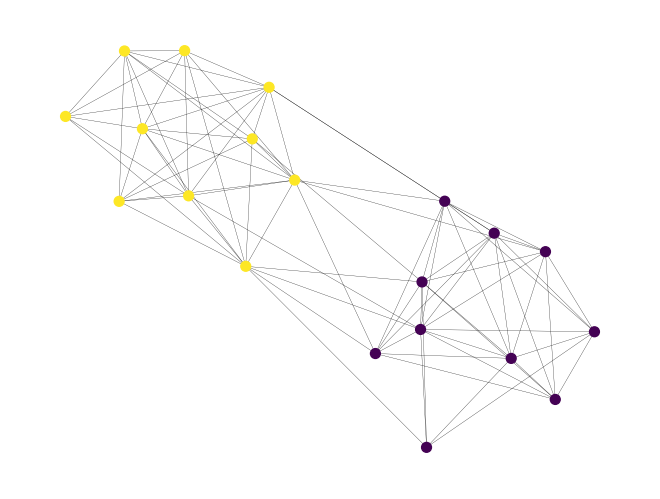

In [721]:
nx.draw(G, node_color=c_hat, with_labels=False, width=0.2, node_size=50)

np.sum(A1)= 168


/var/folders/0c/0z7vdgm924n7cfct5sbdp4nc0000gr/T/ipykernel_71680/1077467255.py:5: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A1 = nx.adjacency_matrix(G1).toarray()


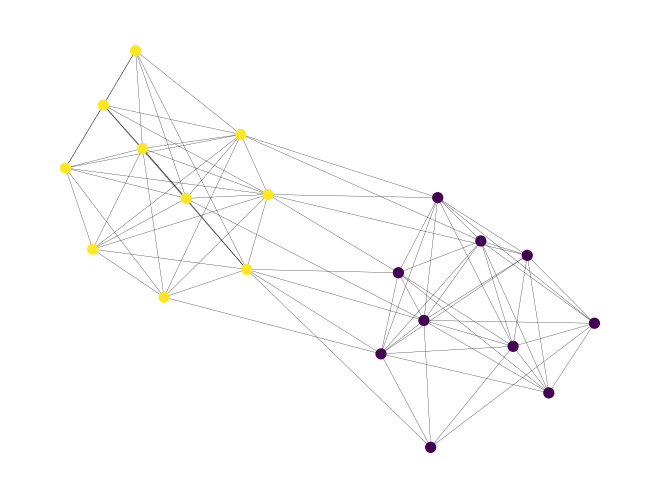

In [722]:
# Now do the same spectral clustering for node-permuted graph

G1 = permute_nodes(G)

A1 = nx.adjacency_matrix(G1).toarray()
print("np.sum(A1)=", np.sum(A1))
w, v = LA.eigh(A1)

v2 = v[:,-2]
c_hat = np.sign(v2)

nx.draw(G1, node_color=c_hat, with_labels=False, width=0.2, node_size=50)

In [ ]:
a = 0.8
b = 0.1
W = b * np.ones([2,2]) + (a-b) * np.eye(2)

r = 10
c = [0]*r + [1]*r 



G1 = permute_nodes(G)

A1 = nx.adjacency_matrix(G1).toarray()
print("np.sum(A1)=", np.sum(A1))
w, v = LA.eigh(A1)

v2 = v[:,-2]
c_hat = np.sign(v2)

nx.draw(G1, node_color=c_hat, with_labels=False, width=0.2, node_size=50)